## Tarea
Va a consistir de 4 pasos basados en lo que aprendimos de como manipular los INEGI shape files.

## Primero
#### Vas a escoger 5 estados y vas a graficar sus vecinos como vimos en el otro archivo. A cada uno de estos grupos los llamaremos grupos de estados.
#### Usa el shapefile de los estados


In [16]:
import geopandas as gpd
file_path_estados = './ShapeFilesFiles/Estados/Estados/conjunto_de_datos/00ent.shp'
gdf_estados = gpd.read_file(file_path_estados)

In [17]:
print(type(gdf_estados))

<class 'geopandas.geodataframe.GeoDataFrame'>


Estado: Aguascalientes
Vecinos: Jalisco, Zacatecas



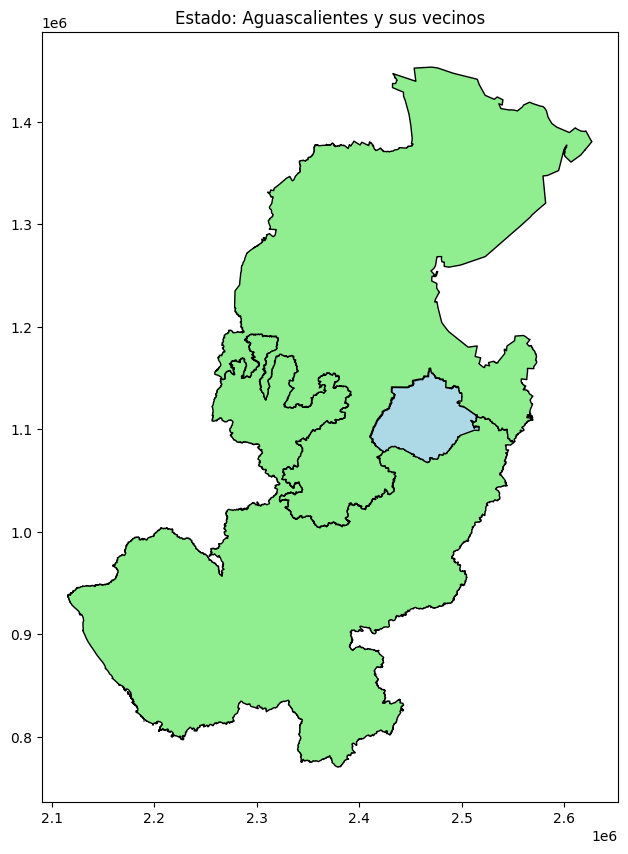

Estado: Colima
Vecinos: Jalisco, Michoacán de Ocampo



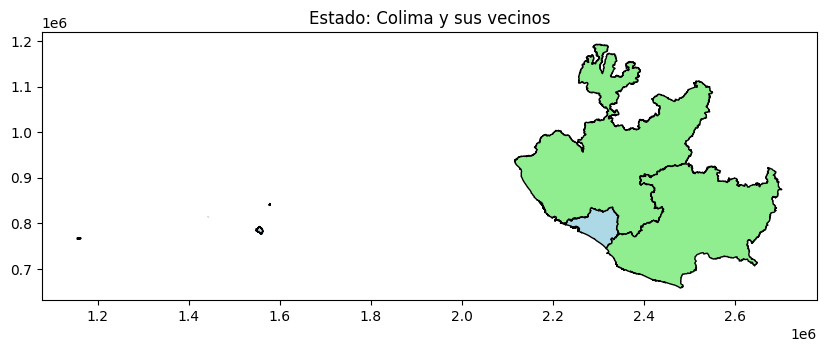

Estado: Puebla
Vecinos: Guerrero, Hidalgo, México, Morelos, Oaxaca, Tlaxcala, Veracruz de Ignacio de la Llave



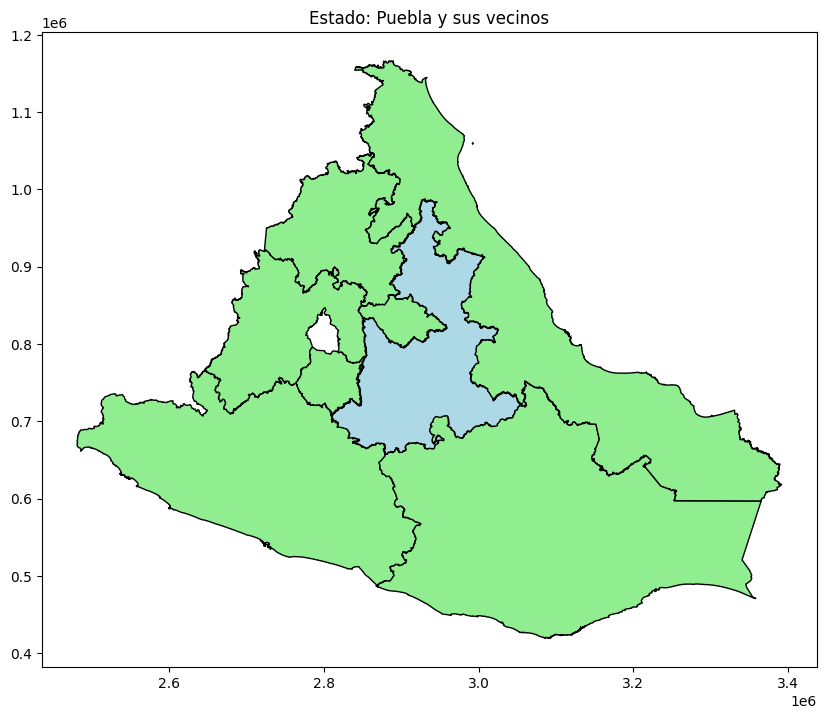

Estado: Sonora
Vecinos: Baja California, Chihuahua, Sinaloa



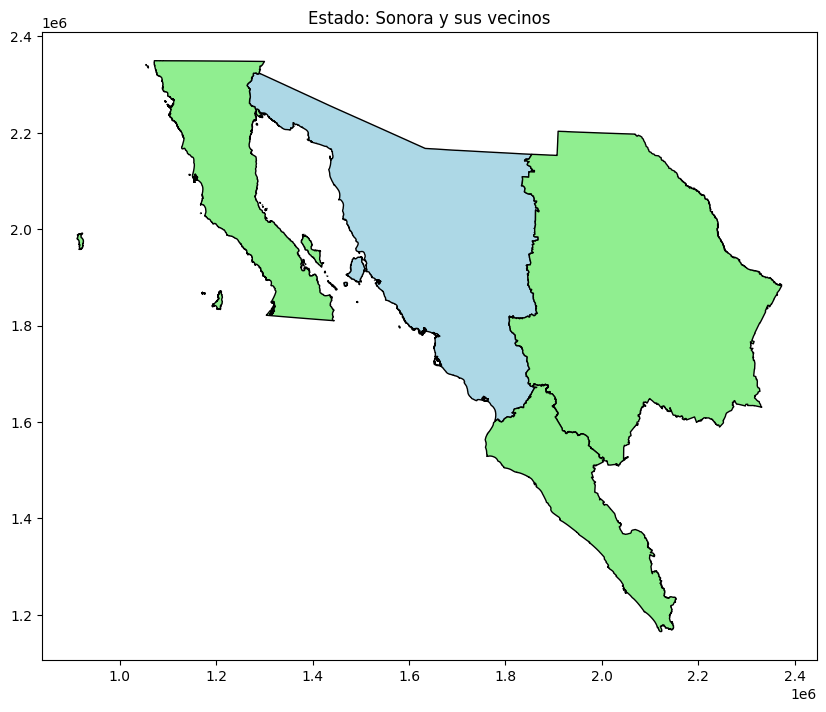

Estado: Tlaxcala
Vecinos: Hidalgo, México, Puebla



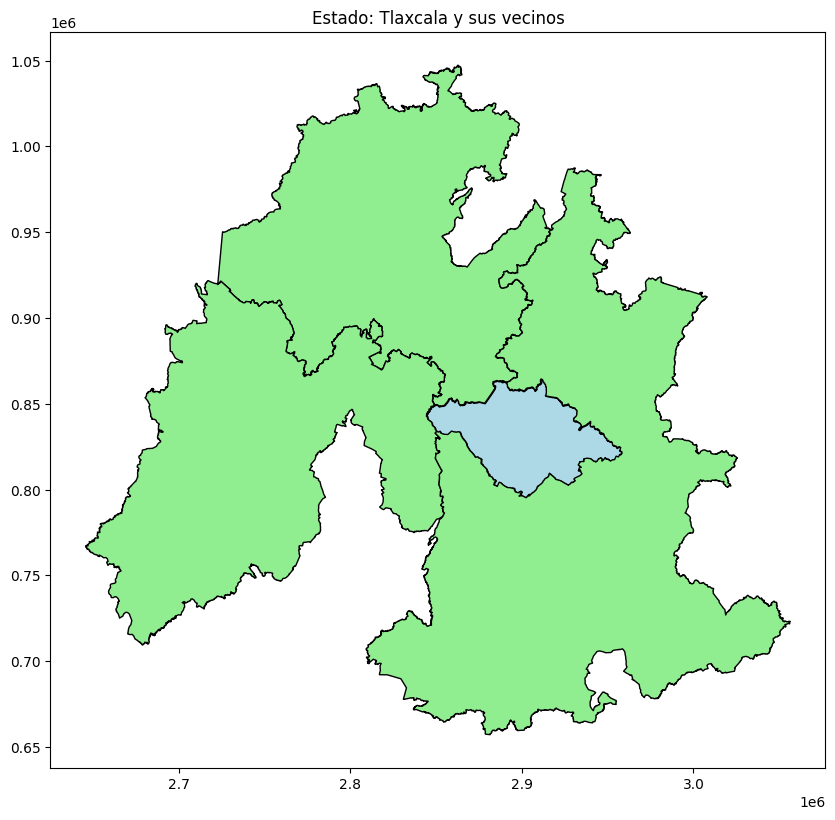

In [18]:
import matplotlib.pyplot as plt

estados = ['Tlaxcala', 'Aguascalientes', 'Sonora', 'Puebla', 'Colima']
gdf_estados_mini = gdf_estados[gdf_estados['NOMGEO'].isin(estados)]

vecinos_dict = {}
# Iterar sobre cada estado en el dataframe
for index, row in gdf_estados_mini.iterrows():
    # Obtener la geometría del estado actual
    estado_geom = row['geometry']
    
    # Encontrar los estados que intersectan con el estado actual (incluye fronteras y superposiciones)
    gdf_vecinos = gdf_estados[gdf_estados.geometry.intersects(estado_geom)]
    
    # Eliminar el estado mismo de la lista de vecinos (si se incluye)
    gdf_vecinos = gdf_vecinos[gdf_vecinos['NOMGEO'] != row['NOMGEO']]
    
    # Obtener los nombres de los vecinos
    vecinos_nombres = gdf_vecinos['NOMGEO'].tolist()
    
    # Almacenar en el diccionario
    vecinos_dict[row['NOMGEO']] = vecinos_nombres

# Imprimir los vecinos de cada estado
for estado, vecinos in vecinos_dict.items():
    print(f"Estado: {estado}")
    print(f"Vecinos: {', '.join(vecinos)}\n")

    # Filtrar los estados vecinos
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    
    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Graficar el estado de interés con un color especial (por ejemplo, en azul)
    gdf_estados[gdf_estados['NOMGEO'] == estado].plot(ax=ax, color='lightblue', edgecolor='black', label=f'{estado}')
    
    # Graficar los estados vecinos con otro color (por ejemplo, en verde)
    gdf_vecinos.plot(ax=ax, color='lightgreen', edgecolor='black', label='Vecinos')
    
    # Personalizar el gráfico
    ax.set_title(f"Estado: {estado} y sus vecinos")
    
    # Mostrar el gráfico
    plt.show()

## Segundo
### En cada grupo de estados vas a graficar las farmacias que se encuentran en el área, al igual que un círculo a su alrededor que tenga un radio de igual longitud que la distancia de esa farmacia a la siguiente farmacia más cercana.

In [19]:
file_path_farmacias = './ShapeFilesFiles/servicios_de_salud_shp/conjunto_de_datos/denue_inegi_62_.shp'
gdf_farmacias_estados = gpd.read_file(file_path_farmacias)

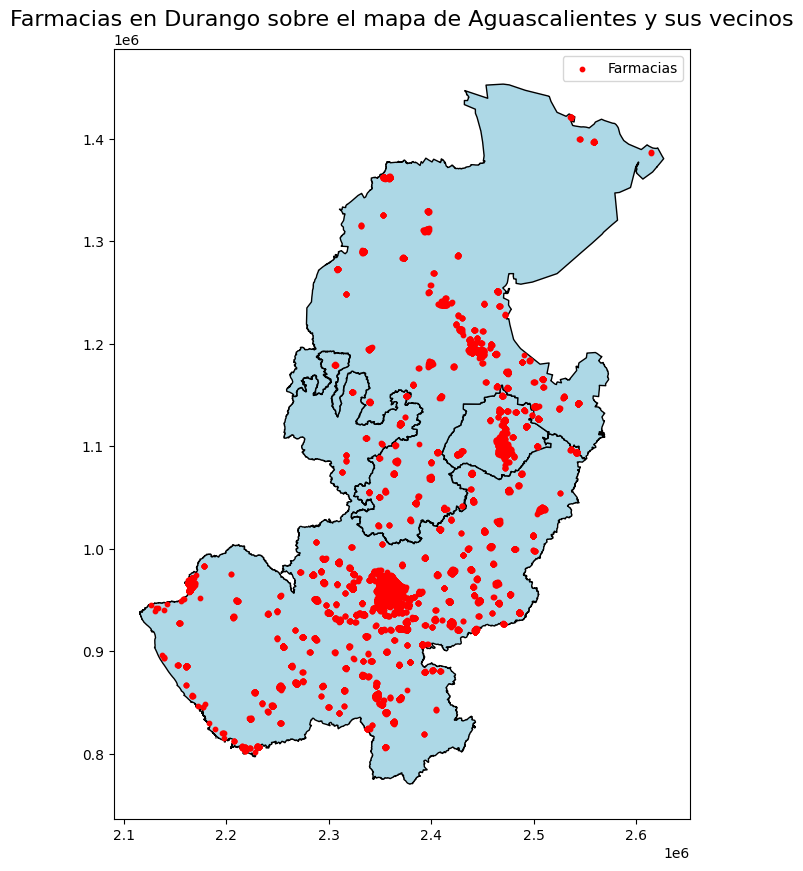

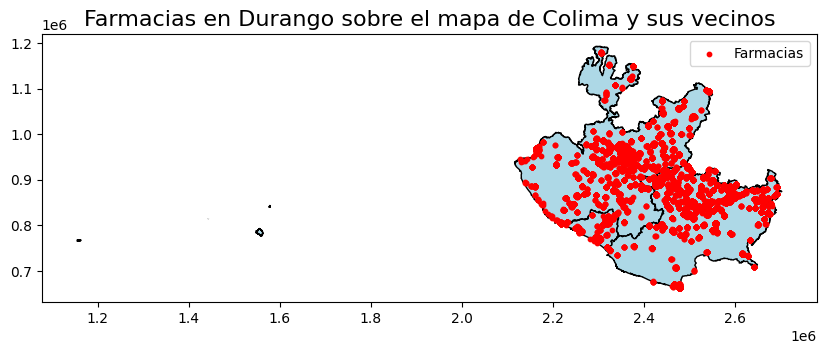

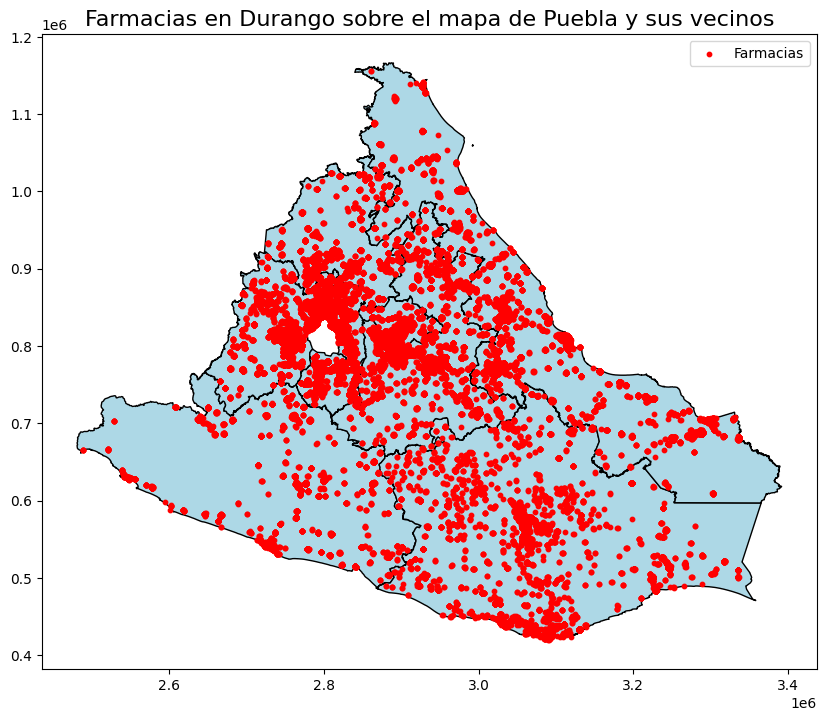

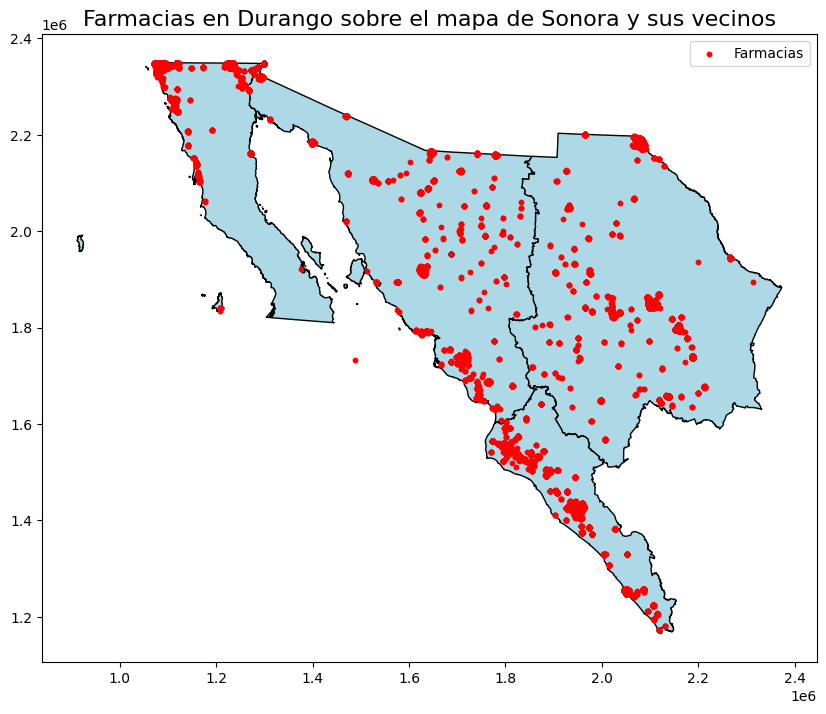

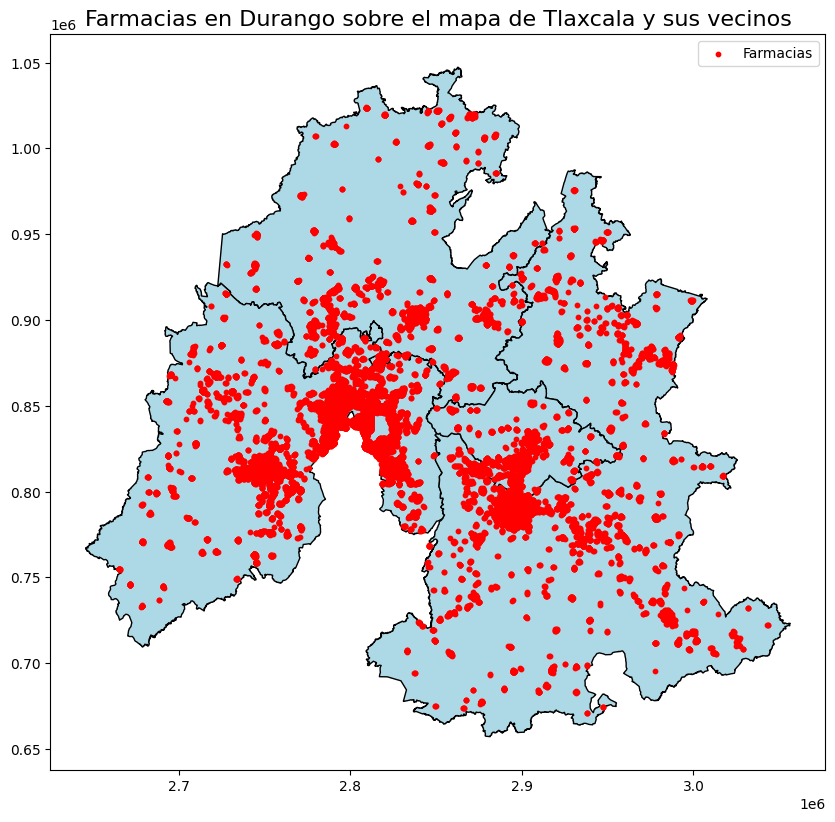

In [ ]:
for estado, vecinos in vecinos_dict.items():
    if gdf_estados.crs != gdf_farmacias_estados.crs:
        gdf_farmacias_estados = gdf_farmacias_estados.to_crs(gdf_estados.crs)

    vecinos.append(estado)
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    # Filtrar las farmacias que están en Durango
    gdf_farmacias_entidad = gdf_farmacias_estados[gdf_farmacias_estados['entidad'].isin(vecinos)]

    # Crear la figura y el eje para graficar
    fig, ax = plt.subplots(figsize=(10, 10))

    # Graficar los límites del estado de Durango (en gris claro)
    gdf_vecinos.plot(ax=ax, color='lightblue', edgecolor='black')

    # Graficar las farmacias de Durango sobre el mapa (en rojo)
    gdf_farmacias_entidad.plot(ax=ax, color='red', markersize=10, label='Farmacias')

    # Añadir título y leyenda
    ax.set_title(f'Farmacias en el mapa sobre el mapa de {estado} y sus vecinos', fontsize=16)
    ax.legend()

    # Mostrar el gráfico
    plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import numpy as np

if gdf_estados.crs != gdf_farmacias_estados.crs:
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(gdf_estados.crs)

if gdf_estados.crs.to_string() != 'EPSG:3857':
    gdf_estados = gdf_estados.to_crs(epsg=3857)
if gdf_farmacias_estados.crs.to_string() != 'EPSG:3857':
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(epsg=3857)

for estado, vecinos in vecinos_dict.items():

    vecinos.append(estado)
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    gdf_farmacias_entidad = gdf_farmacias_estados[gdf_farmacias_estados['entidad'].isin(vecinos)]

    # Lista para almacenar las distancias mínimas
    nearest_distances = []

    # Calcular distancias sin scipy
    for idx, farmacia in gdf_farmacias_entidad.iterrows():
        # Excluir la farmacia actual del cálculo
        otras_farmacias = gdf_farmacias_entidad.drop(idx)
        if otras_farmacias.empty:
            # Si no hay otras farmacias, asigna NaN o un valor predeterminado
            nearest_distances.append(float('nan'))
        else:
            # Calcular las distancias a todas las demás farmacias
            distancias = otras_farmacias.geometry.distance(farmacia.geometry)
            print(distancias.min())
            # Guardar la distancia mínima
            nearest_distances.append(distancias.min())

    # Añadir la columna de distancias mínimas al GeoDataFrame
    gdf_farmacias_entidad['nearest_distance'] = nearest_distances

    # Crear los buffers
    gdf_farmacias_entidad['buffer'] = gdf_farmacias_entidad.apply(
        lambda row: row.geometry.buffer(row['nearest_distance']), axis=1
    )

    # Crear la figura y el eje para graficar
    fig, ax = plt.subplots(figsize=(10, 10))

    # Graficar los límites del estado y sus vecinos
    gdf_vecinos.plot(ax=ax, color='lightblue', edgecolor='black')

    # Graficar las farmacias
    gdf_farmacias_entidad.plot(ax=ax, color='red', markersize=10, label='Farmacias')

    # Graficar los buffers
    gdf_farmacias_entidad.set_geometry('buffer').plot(ax=ax, edgecolor='blue', alpha=0.3)

    # Añadir título y leyenda
    ax.set_title(f'Farmacias en {estado} y sus vecinos', fontsize=16)
    ax.legend()

    # Mostrar o guardar el gráfico
    plt.show()

## Tercero
### Por grupo de estados debes calcular cual es la farmacia que en promedio está más alejada de el resto de farmacios.
### Debes graficar las distancias de esta farmacia al resto de las farmacias en el grupo de estados.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

if gdf_estados.crs != gdf_farmacias_estados.crs:
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(gdf_estados.crs)

# Asegúrate de usar un CRS métrico
if gdf_estados.crs.to_string() != 'EPSG:3857':
    gdf_estados = gdf_estados.to_crs(epsg=3857)
if gdf_farmacias_estados.crs.to_string() != 'EPSG:3857':
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(epsg=3857)

# Procesar cada grupo de estados
for estado, vecinos in vecinos_dict.items():
    vecinos.append(estado)
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    gdf_farmacias_entidad = gdf_farmacias_estados[gdf_farmacias_estados['entidad'].isin(vecinos)]

    # Calcular las distancias promedio para cada farmacia
    average_distances = []
    for idx, farmacia in gdf_farmacias_entidad.iterrows():
        # Calcular distancias a todas las demás farmacias
        otras_farmacias = gdf_farmacias_entidad.drop(idx)
        if otras_farmacias.empty:
            # Si no hay otras farmacias, asignar NaN
            average_distances.append(float('nan'))
        else:
            distancias = otras_farmacias.geometry.distance(farmacia.geometry)
            average_distances.append(distancias.mean())

    # Añadir la columna de distancias promedio
    gdf_farmacias_entidad['average_distance'] = average_distances

    # Encontrar la farmacia con la mayor distancia promedio
    max_avg_distance_row = gdf_farmacias_entidad.loc[gdf_farmacias_entidad['average_distance'].idxmax()]

    # Calcular las distancias de esta farmacia al resto
    farmacia_geometry = max_avg_distance_row.geometry
    distancias_a_otros = gdf_farmacias_entidad.geometry.distance(farmacia_geometry)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(10, 10))

    # Graficar los límites del estado y sus vecinos
    gdf_vecinos.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

    # Graficar todas las farmacias
    gdf_farmacias_entidad.plot(ax=ax, color='gray', markersize=10, label='Farmacias')

    # Resaltar la farmacia más lejana
    ax.scatter(
        [farmacia_geometry.x], 
        [farmacia_geometry.y], 
        color='red', 
        s=50, 
        label='Farmacia más alejada (promedio)'
    )

    # Añadir líneas entre la farmacia seleccionada y las demás
    for geom, distancia in zip(gdf_farmacias_entidad.geometry, distancias_a_otros):
        ax.plot(
            [farmacia_geometry.x, geom.x],
            [farmacia_geometry.y, geom.y],
            linestyle='--',
            alpha=0.7
        )

    # Añadir título y leyenda
    ax.set_title(f'Farmacia más alejada en promedio ({estado})', fontsize=16)
    ax.legend()

    # Mostrar el gráfico
    plt.show()


## Cuarto
### Calcula cual es el grupo de estados con mayor distancia promedio entre sus farmacias.
### Luego grafica el país completo con el shapefile de estados y grafica el grupo de estados con mayor distancia promedio entre farmacias de un color distinto.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

if gdf_estados.crs != gdf_farmacias_estados.crs:
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(gdf_estados.crs)

# Asegúrate de usar un CRS métrico
if gdf_estados.crs.to_string() != 'EPSG:3857':
    gdf_estados = gdf_estados.to_crs(epsg=3857)
if gdf_farmacias_estados.crs.to_string() != 'EPSG:3857':
    gdf_farmacias_estados = gdf_farmacias_estados.to_crs(epsg=3857)

# Almacenar resultados por grupo de estados
grupo_distancias = {}

# Procesar cada grupo de estados
for estado, vecinos in vecinos_dict.items():
    vecinos.append(estado)
    gdf_vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(vecinos)]
    gdf_farmacias_entidad = gdf_farmacias_estados[gdf_farmacias_estados['entidad'].isin(vecinos)]

    # Calcular las distancias promedio entre farmacias
    if len(gdf_farmacias_entidad) > 1:
        distancias_promedio = []
        for idx, farmacia in gdf_farmacias_entidad.iterrows():
            # Excluir la farmacia actual
            otras_farmacias = gdf_farmacias_entidad.drop(idx)
            distancias = otras_farmacias.geometry.distance(farmacia.geometry)
            distancias_promedio.append(distancias.mean())
        # Calcular el promedio de todas las distancias
        grupo_distancias[tuple(vecinos)] = sum(distancias_promedio) / len(distancias_promedio)

# Encontrar el grupo con la mayor distancia promedio
grupo_max_distancia = max(grupo_distancias, key=grupo_distancias.get)
distancia_max_promedio = grupo_distancias[grupo_max_distancia]

# Obtener los estados en el grupo con mayor distancia promedio
gdf_max_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(grupo_max_distancia)]

# Graficar el país completo y resaltar el grupo con mayor distancia promedio
fig, ax = plt.subplots(figsize=(15, 15))

# Graficar todos los estados
gdf_estados.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# Resaltar el grupo de estados con mayor distancia promedio
gdf_max_grupo.plot(ax=ax, color='orange', edgecolor='black', alpha=0.8, label='Grupo con mayor distancia promedio')

# Añadir título y leyenda
ax.set_title('Grupo de estados con mayor distancia promedio entre farmacias', fontsize=18)
ax.legend()

# Mostrar el gráfico
plt.show()

# Imprimir información del grupo
print(f"El grupo de estados con la mayor distancia promedio entre farmacias es: {grupo_max_distancia}")
print(f"Distancia promedio: {distancia_max_promedio:.2f} unidades")
